## Import Libraries

In [38]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import ast
from statistics import mean, median
import matplotlib.pyplot as plt

## Loading the Dataset

In [20]:
# Loading in and setting the data
user_data = pd.read_csv('SavedData/user_large.csv')
user_df = pd.DataFrame(user_data)

# Changing the lists back to normal columns
user_df['user_biz_interaction'] = user_df['user_biz_interaction'].apply(ast.literal_eval)
user_df['user_biz_interaction_frequency'] = user_df['user_biz_interaction_frequency'].apply(ast.literal_eval)
user_df['user_user_interaction'] = user_df['user_user_interaction'].apply(ast.literal_eval)
user_df['user_user_interaction_frequency'] = user_df['user_user_interaction_frequency'].apply(ast.literal_eval)
user_df['user_industry_interaction'] = user_df['user_industry_interaction'].apply(ast.literal_eval)
user_df['user_industry_interaction_frequency'] = user_df['user_industry_interaction_frequency'].apply(ast.literal_eval)

In [23]:
user_id_list = user_df['user_id']

In [22]:
user_df.head()

,user_id,total_tx_count,net_tx_count,total_tx_sum_gbp,net_tx_sum_gbp,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,received_tx_sum_gbp,received_tx_mean_gbp,received_tx_median_gbp,user_biz_interaction,user_biz_interaction_frequency,user_user_interaction,user_user_interaction_frequency,user_industry_interaction,user_industry_interaction_frequency
0,1000,1903,1517,37720.11,19676.91,1710,28698.51,7.854277,4.5,193,9021.60,46.744041,5.5,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","[16354, 18013, 30208, 31489, 36647, 38289, 411...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[2, 1, 1, 808, 2, 3, 37, 1, 7, 2, 35, 21, 353,..."
1,10000,1114,720,21360.39,18944.39,917,20152.39,21.372710,11.0,197,1208.00,6.131980,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","[15896, 28620, 33124, 33732, 34123, 5277, 5439...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","[Alcohol, Apparel, Books, Cafes, Coffee Beans ...","[1, 23, 34, 20, 1, 51, 2, 1, 17, 312, 119, 3, ..."
2,100000,1919,1433,23455.27,20720.37,1676,22087.82,11.567202,4.5,243,1367.45,5.627366,6.0,"[ACCESSORY_SHOP, A_CAFE, A_LOCAL_COFFEE_SHOP, ...","[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","[12753, 24398, 24951, 28719, 34678, 39736, 489...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","[Accessories, Alcohol, Apparel, Cafes, Coffee ...","[15, 6, 1, 823, 10, 58, 5, 2, 23, 1, 334, 65, ..."
3,100002,1561,1233,22393.96,20303.16,1397,21348.56,13.390346,4.5,164,1045.40,6.374390,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","[10432, 14001, 3296, 37438, 37918, 46953, 5047...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[7, 32, 2, 233, 2, 3, 33, 4, 2, 10, 317, 511, ..."
4,100019,1157,719,44632.75,16232.85,938,30432.80,20.213062,9.0,219,14199.95,64.839954,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","[22634, 38580, 40565, 44911, 61350, 62299, 626...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[1, 25, 1, 213, 4, 1, 38, 1, 13, 13, 314, 1, 6..."


### Alcoholics Index

In [36]:
alcohol_interaction_frequency = []

for user_df_index in range(0, len(user_df['user_industry_interaction'])):
    if 'Alcohol' in user_df['user_industry_interaction'][user_df_index]:
        alcohol_index = user_df['user_industry_interaction'][user_df_index].index('Alcohol')
        alcohol_count = user_df['user_industry_interaction_frequency'][user_df_index][alcohol_index]
    else:
        alcohol_count = 0
        
    alcohol_interaction_frequency.append(alcohol_count)
    
alcohol_interaction_zip = zip(user_id_list, alcohol_interaction_frequency)
sorted_alcohol_interaction_zip = sorted(alcohol_interaction_zip, key=lambda x: x[1])

alc_user_id, sorted_alcohol_interaction_frequency = zip(*sorted_alcohol_interaction_zip)

alc_user_id_list = list(alc_user_id)
sorted_alcohol_interaction_frequency_list = list(sorted_alcohol_interaction_frequency)

print(alc_user_id_list)
print(sorted_alcohol_interaction_frequency_list)

alcohol_consumption_average = mean(sorted_alcohol_interaction_frequency_list)
print(alcohol_consumption_average)



[100021, 100023, 100027, 100056, 100064, 100065, 100083, 100086, 100094, 100098, 10013, 100138, 100140, 100142, 100153, 100155, 100163, 100165, 100175, 100186, 100217, 100219, 100228, 100233, 100250, 100261, 100274, 100275, 100280, 100282, 100295, 100297, 10030, 100302, 100305, 100368, 100373, 100401, 100446, 100455, 100466, 100480, 100488, 100517, 100546, 100568, 100570, 100572, 100595, 100599, 100600, 100611, 100617, 100620, 100622, 100625, 100635, 100662, 100664, 100687, 100708, 100709, 100727, 100728, 100735, 100746, 100752, 100754, 100758, 100774, 10078, 100786, 100788, 100796, 100803, 100817, 100832, 100856, 100861, 100875, 100892, 100897, 10091, 100925, 10096, 100967, 100984, 10116, 10126, 10140, 10142, 10152, 10165, 10167, 10169, 10172, 10192, 10197, 10211, 1023, 10240, 10266, 10267, 10296, 10302, 10384, 10389, 10394, 10395, 10400, 10420, 10427, 10436, 10451, 10466, 10480, 10489, 10500, 10501, 10505, 10515, 10525, 10526, 10534, 10548, 1055, 10571, 10581, 10596, 10607, 1062, 106

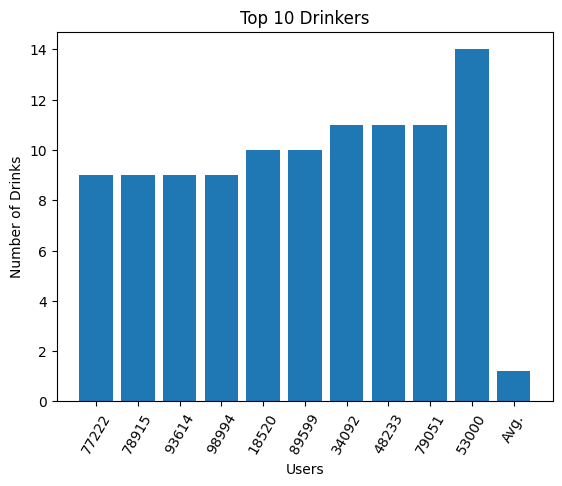

In [54]:
# Convert list to bar chart lists
x_alc_bar = [str(item) for item in alc_user_id_list[-10:]]
x_alc_bar.append("Avg.")
y_alc_bar = sorted_alcohol_interaction_frequency_list[-10:]
y_alc_bar.append(alcohol_consumption_average)

# Creating Alcoholics Bar Chart
plt.bar(x_alc_bar, y_alc_bar)

# Adding labels and title for clarity
plt.xlabel('Users')
plt.ylabel('Number of Drinks')
plt.xticks(rotation=60)
plt.title('Top 10 Drinkers')

# Show the plot
plt.show()